# CSC311 Machine Learning Part 1b

## Logistic Regression



## Set up notebook

In [2]:
#Import packages
import numpy as np
import pandas as pn
from IPython.display import display,HTML
import joblib
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as sklm
import matplotlib
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

## Load datasets (training dataset and cross-validation dataset)

In [3]:
train_dataset = np.genfromtxt('group22_train.dat',delimiter=",", dtype="int32")
cv_dataset    = np.genfromtxt('group22_cv.dat',delimiter=",", dtype="int32")

## set up dataset

In [6]:
## training dataset
m_train = train_dataset.shape[0]
n_train = train_dataset.shape[1]-1

X_train = train_dataset[:,0:n_train]
y_train = train_dataset[:,n_train].reshape(m_train,1)


#Cross-validation dataset

m_cv = cv_dataset.shape[0]
n_cv = cv_dataset.shape[1]-1

X_train_recons = X_train.reshape(m_train,64,64,3) 
X_cv = cv_dataset[:,0:n_cv]

#use this to display view images from the dataset
y_cv = cv_dataset[:,n_cv].reshape(m_cv,1)


## Display few images from the dataset

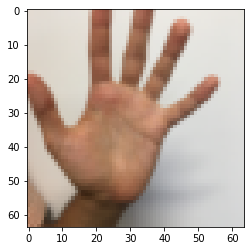

In [9]:
indextoshow = 25
plt.imshow(X_train_recons[indextoshow])
for i in range(3):
    plt.imshow( X_train_recons[i] )


## Scale dataset values to be between (0-1)

In [11]:
#training dataset
X_train_scaled = X_train / 255
X_train_scaled = X_train.astype(float)

#cross-validation dataset
X_cv_scaled = X_cv / 255
X_cv_scaled = X_cv.astype(float)


## Train a Logistic Regression classifier

Setup sklearn and implementing the multiclass logistic regression.

In [19]:
array = []
i = 0.01

while i < 1 :
    classifier = LogisticRegression(multi_class='auto',solver = 'lbfgs', C = i, max_iter = 5000 )
    
    classifier.fit(X_train_scaled, np.ravel(y_train))
    ypred = classifier.predict(X_cv_scaled)
    accuracy = sklm.accuracy_score(y_cv, ypred)*100
    
    array.append([i, accuracy, classifier])
    i += 0.01

In [21]:
accuracy_array = []
model_array = []

for i in range(len(array)):
    accuracy_array.append( array[i][1] )
    model_array.append( array[i][2])

## Save classifier to disk

In [25]:
classifier = model_array[accuracy_array.index( max(accuracy_array))]
joblib_file = "logreg.pkl"  
joblib.dump(classifier, joblib_file)

['logreg.pkl']